# <b> Spotify EDA : Understanding Music Leaderboard Trend 

In [62]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


sns.set_style('white')

Analysis Objectives: To identify audio characteristics that correlate with song popularity, analyze music trends over time, and group songs into clusters based on their audio profiles. We will explore the relationship between audio features and song success metrics (popularity, daily_rank), the year-to-date trends in these features, and the characteristics of the resulting music clusters.

Key Questions to be Answered:
1. What are the general characteristics of the songs that appear on this chart?
2. Is there a significant relationship between specific audio features and their popularity?
3. Do songs with explicit content tend to be more popular?
4. What is the distribution of artists in this dataset?
5. Can we group songs into specific labels or "moods"?
6. How do mood trends in popular songs change over the years?
7. What is the distribution of popularity within each cluster?
8. Do shorter songs tend to be more successful in the current streaming era?
9. What is the average time it takes for a song to reach popularity after its release?

In [63]:
df = pd.read_csv("universal_top_spotify_songs.csv")
df.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2RkZ5LkEzeHGRsmDqKwmaJ,Ordinary,Alex Warren,1,1,0,NaN,2025-06-11,95,False,...,2,-6.141,1,0.0600,0.704000,0.000007,0.0550,0.391,168.115,3
1,42UBPzRMh5yyz0EDPr6fr1,Manchild,Sabrina Carpenter,2,-1,48,NaN,2025-06-11,89,True,...,7,-5.087,1,0.0572,0.122000,0.000000,0.3170,0.811,123.010,4
2,0FTmksd2dxiE5e3rWyJXs6,back to friends,sombr,3,0,1,NaN,2025-06-11,98,False,...,1,-2.291,1,0.0301,0.000094,0.000088,0.0929,0.235,92.855,4
3,7so0lgd0zP2Sbgs2d7a1SZ,Die With A Smile,"Lady Gaga, Bruno Mars",4,0,-1,NaN,2025-06-11,91,False,...,6,-7.727,0,0.0317,0.289000,0.000000,0.1260,0.498,157.964,3
4,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,5,1,0,NaN,2025-06-11,100,False,...,2,-10.171,1,0.0358,0.200000,0.060800,0.1170,0.438,104.978,4


## <b> Data preprocessing

#### <b> Initial data inspection


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110316 entries, 0 to 2110315
Data columns (total 25 columns):
 #   Column              Dtype  
---  ------              -----  
 0   spotify_id          object 
 1   name                object 
 2   artists             object 
 3   daily_rank          int64  
 4   daily_movement      int64  
 5   weekly_movement     int64  
 6   country             object 
 7   snapshot_date       object 
 8   popularity          int64  
 9   is_explicit         bool   
 10  duration_ms         int64  
 11  album_name          object 
 12  album_release_date  object 
 13  danceability        float64
 14  energy              float64
 15  key                 int64  
 16  loudness            float64
 17  mode                int64  
 18  speechiness         float64
 19  acousticness        float64
 20  instrumentalness    float64
 21  liveness            float64
 22  valence             float64
 23  tempo               float64
 24  time_signature      int6

In [65]:
df.isna().sum()

spotify_id                0
name                     30
artists                  29
daily_rank                0
daily_movement            0
weekly_movement           0
country               28908
snapshot_date             0
popularity                0
is_explicit               0
duration_ms               0
album_name              822
album_release_date      659
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
dtype: int64

In [66]:
df.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2RkZ5LkEzeHGRsmDqKwmaJ,Ordinary,Alex Warren,1,1,0,NaN,2025-06-11,95,False,...,2,-6.141,1,0.0600,0.704000,0.000007,0.0550,0.391,168.115,3
1,42UBPzRMh5yyz0EDPr6fr1,Manchild,Sabrina Carpenter,2,-1,48,NaN,2025-06-11,89,True,...,7,-5.087,1,0.0572,0.122000,0.000000,0.3170,0.811,123.010,4
2,0FTmksd2dxiE5e3rWyJXs6,back to friends,sombr,3,0,1,NaN,2025-06-11,98,False,...,1,-2.291,1,0.0301,0.000094,0.000088,0.0929,0.235,92.855,4
3,7so0lgd0zP2Sbgs2d7a1SZ,Die With A Smile,"Lady Gaga, Bruno Mars",4,0,-1,NaN,2025-06-11,91,False,...,6,-7.727,0,0.0317,0.289000,0.000000,0.1260,0.498,157.964,3
4,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,5,1,0,NaN,2025-06-11,100,False,...,2,-10.171,1,0.0358,0.200000,0.060800,0.1170,0.438,104.978,4


The dataset has 25 columns, with 7 qualitative variables and 18 quantitative variables. Missing values are found in the variables ```country```, ```album_name``` and ```album_release_date```.

#### <b> Data cleaning

In [67]:
# This column has too many missing values to be useful.
df.drop(columns=['country'], inplace=True)

because there are too many missing values, and they are not used in EDA, they will be dropped so as not to interfere

In [68]:
# Impute 'artists' using similar name, album_name in this dataset
artist_map = df.dropna(subset=['artists']).groupby(['name', 'album_name'])['artists'].agg(pd.Series.mode)
artist_map = artist_map.apply(lambda x: x[0] if isinstance(x, (list, pd.Series)) else x)

# Apply the mapping
df.set_index(['name', 'album_name'], inplace=True)
df['artists'].fillna(artist_map, inplace=True)
df.reset_index(inplace=True)

To handle missing values for artists, first look for similar album_names and names in the dataset, then search for artists in the same data. Using album_name is also a consideration, as the song names may be the same.

In [69]:
# Impute 'album_name' & 'album_release_date' use similar name, artists
album_name_map = df.dropna(subset=['album_name']).groupby(['name', 'artists'])['album_name'].agg(pd.Series.mode)
album_name_map = album_name_map.apply(lambda x: x[0] if isinstance(x, (list, pd.Series)) else x)

album_release_date_map = df.dropna(subset=['album_release_date']).groupby(['name', 'artists'])['album_release_date'].agg(pd.Series.mode)
album_release_date_map = album_release_date_map.apply(lambda x: x[0] if isinstance(x, (list, pd.Series)) else x)

# Apply the mappings
df.set_index(['name', 'artists'], inplace=True)
df['album_name'].fillna(album_name_map, inplace=True)
df['album_release_date'].fillna(album_release_date_map, inplace=True)
df.reset_index(inplace=True)

The concept is the same as inputting missing value artists, looking for the same song and artist in the dataset then looking for album_name data to input

In [70]:
df = df.dropna()

In [71]:
df.isna().sum()

name                  0
artists               0
album_name            0
spotify_id            0
daily_rank            0
daily_movement        0
weekly_movement       0
snapshot_date         0
popularity            0
is_explicit           0
duration_ms           0
album_release_date    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
dtype: int64

for the rest, the data of which cannot be mapped from the records in the dataset will be deleted.

#### <b> Fix misformated data

In [72]:
# convert datatype to datetime
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])
df['album_release_date'] = pd.to_datetime(df['album_release_date'])

The two variables above are time data, it is better to convert them to ```datetime``` rather than continuing to use the ```object``` format.

#### <b> Feature engineering

In [73]:
# Calculate the difference between the two dates. The result is a Timedelta object (Songs Age in day)
df['song_age_days'] = (df['snapshot_date'] - df['album_release_date']).dt.days

This variable will make it easier for us to analyze leaderboard songs. This feature can be used to find out the age of a song in days.

In [74]:
# Convert the duration from milliseconds to seconds by dividing by 1000.
df['duration_seconds'] = df['duration_ms'] / 1000
df.drop(columns=['duration_ms'], inplace=True)

The most commonly used unit for song duration is seconds, while this dataset uses milliseconds for its recorded data. To simplify analysis and simplify the process, it will be converted to seconds.

## <b> Descriptive Statistics

#### <b> Dataset characteristic analysis

In [75]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
daily_rank,2109828.0,25.49088,1.0,13.0,25.0,38.0,50.0,14.42908
daily_movement,2109828.0,0.922478,-49.0,-1.0,0.0,2.0,49.0,7.014753
weekly_movement,2109828.0,2.931546,-49.0,-3.0,0.0,5.0,49.0,12.331188
snapshot_date,2109828,2024-08-08 14:07:34.640283904,2023-10-18 00:00:00,2024-03-10 00:00:00,2024-08-05 00:00:00,2025-01-08 00:00:00,2025-06-11 00:00:00,NaN
popularity,2109828.0,75.907929,0.0,65.0,79.0,88.0,100.0,15.761271
album_release_date,2109828,2022-06-13 13:30:45.527502336,1900-01-01 00:00:00,2023-06-29 00:00:00,2024-02-02 00:00:00,2024-07-25 00:00:00,2025-07-18 00:00:00,NaN
danceability,2109828.0,0.67595,0.0,0.58,0.7,0.78,0.988,0.144032
energy,2109828.0,0.648833,0.00002,0.552,0.668,0.767,0.998,0.168853
key,2109828.0,5.526406,0.0,2.0,6.0,9.0,11.0,3.595156
loudness,2109828.0,-6.771797,-54.341,-7.829,-6.064,-4.723,3.233,3.874188


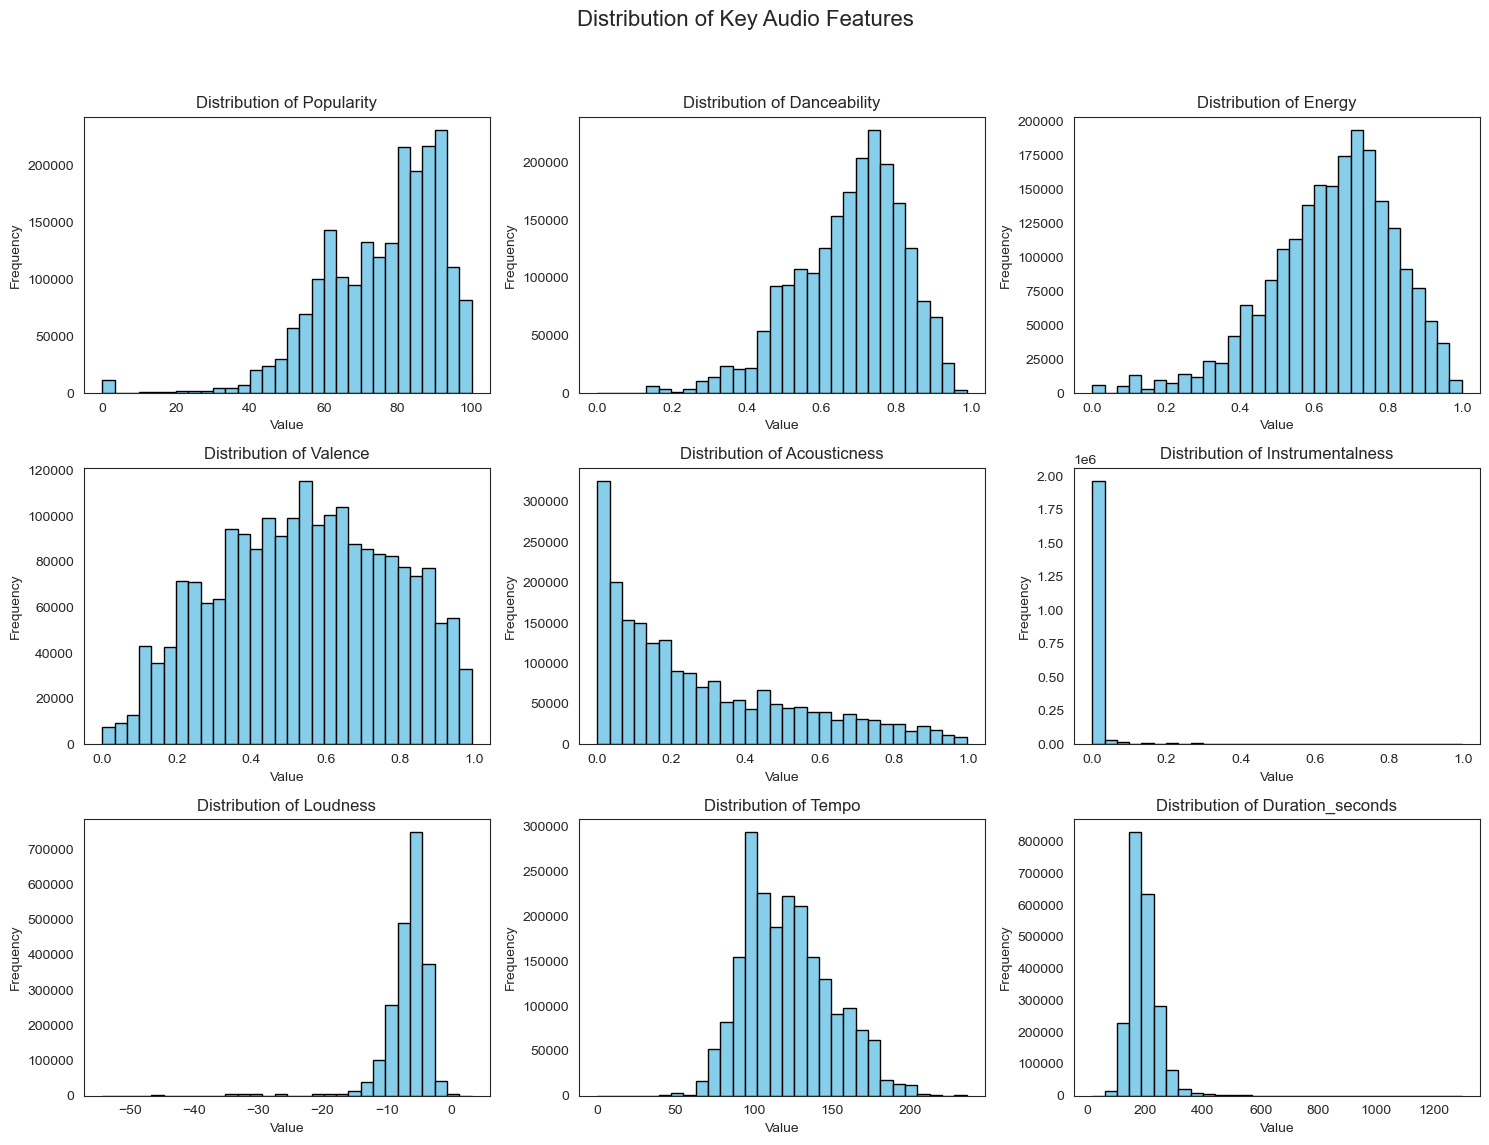

In [76]:
features_to_plot = [
    'popularity', 'danceability', 'energy', 'valence', 
    'acousticness', 'instrumentalness', 'loudness', 'tempo', 'duration_seconds'
]

# Create a figure with subplots (3 rows, 3 columns)
# This helps in visualizing all plots together.
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribution of Key Audio Features', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the features and plot a histogram for each
for i, feature in enumerate(features_to_plot):
    ax = axes[i]
    # Plotting the histogram with 30 bins for good detail
    ax.hist(df[feature], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {feature.capitalize()}', fontsize=12)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent titles from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The popularity distribution is strongly skewed to the left, with a mean of 75.9 and a median of 79.0. This indicates that most of the songs in this dataset are indeed hits.

Although there are some very old songs, the median song age (song_age_days) is 134 days, or about 4.5 months. This indicates that the chart is dominated by relatively new songs.

These songs tend to have quite high energy (mean 0.65) and danceability (mean 0.67). The distribution is visible in the histogram, which peaks on the right side. The most common song tempo is around 122 BPM (beats per minute), which is a common tempo for pop music.

The acousticness and instrumentalness histograms are heavily skewed to the right. The majority of songs have very low scores for both of these features, indicating they are likely electronically produced rather than instrumentally.

Song lengths are closely centered around 186 seconds (the median), or about 3 minutes, which is a standard length for a radio or streaming song.

#### <b> Explicit songs analysis

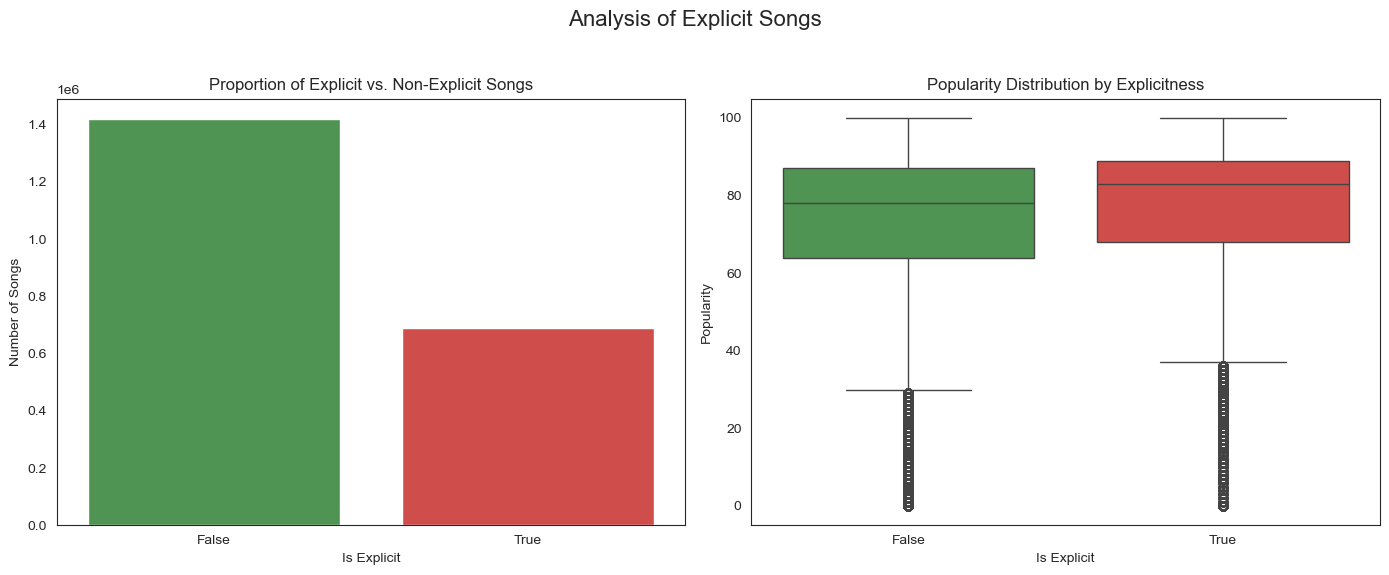

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Analysis of Explicit Songs', fontsize=16)

# This plot shows the total number of explicit vs. non-explicit songs.
sns.countplot(ax=axes[0], data=df, x='is_explicit', palette=['#43a047', '#e53935'])
axes[0].set_title('Proportion of Explicit vs. Non-Explicit Songs')
axes[0].set_xlabel('Is Explicit')
axes[0].set_ylabel('Number of Songs')


# This plot compares the distribution explicit and non-explicit.
sns.boxplot(ax=axes[1], data=df, x='is_explicit', y='popularity', palette=['#43a047', '#e53935'])
axes[1].set_title('Popularity Distribution by Explicitness')
axes[1].set_xlabel('Is Explicit')
axes[1].set_ylabel('Popularity')


# Adjust layout and save the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

This dataset is dominated by non-explicit songs (False). In general, the popularity range of explicit songs is slightly higher than that of non-explicit songs (as seen from the median). Although fewer in the charts, songs with explicit content (True) tend to have higher popularity levels than non-explicit songs (False) in this dataset.

#### <b> Artist distribution analysis

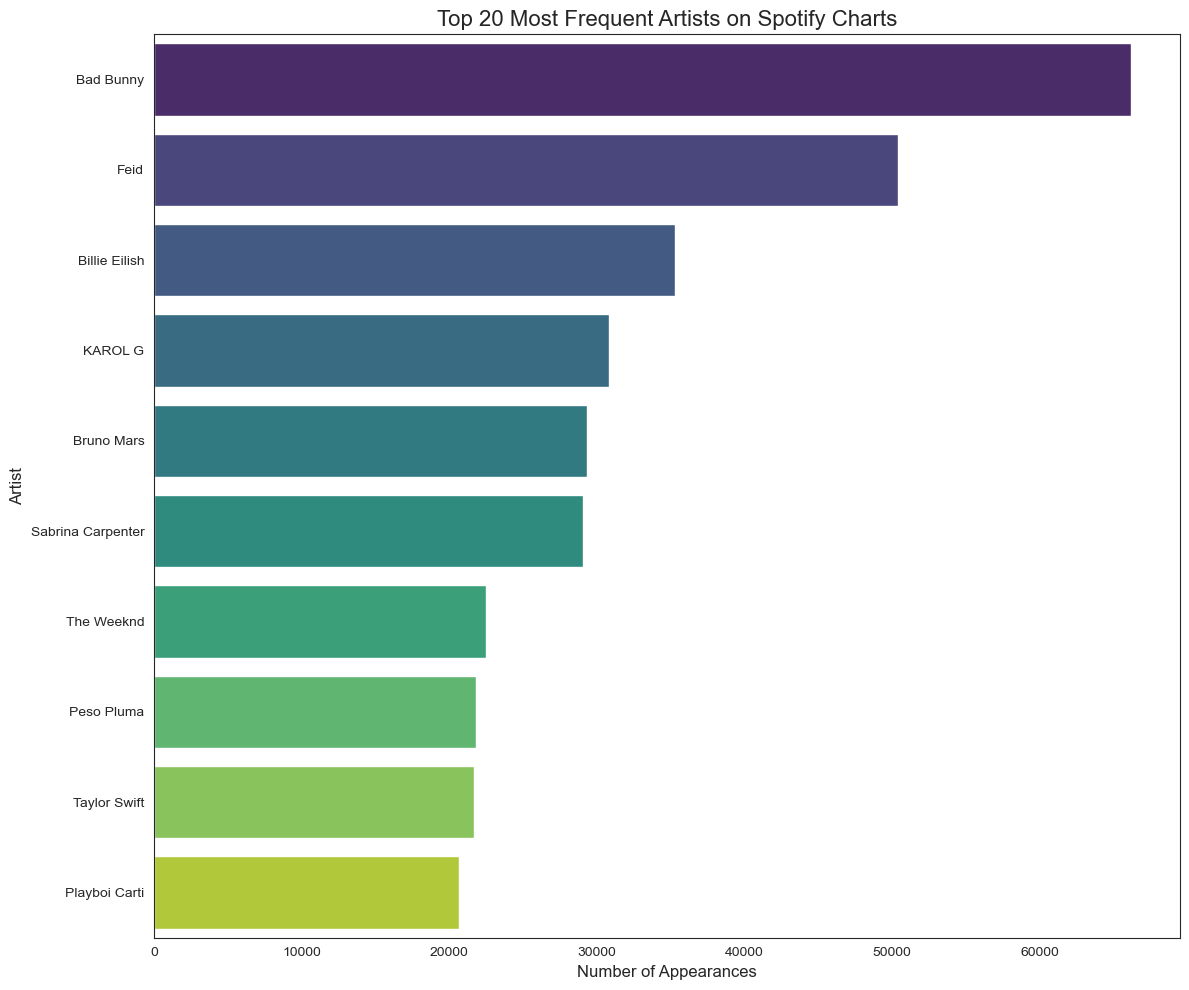

In [78]:
# Split artists string by ', ', then explode the list into separate rows
top_20_artists = df['artists'].str.split(', ').explode().value_counts().head(10)

# Create a figure for the plot
plt.figure(figsize=(12, 10))
sns.barplot(x=top_20_artists.values, y=top_20_artists.index, palette='viridis')

# Set titles and labels for clarity
plt.title('Top 20 Most Frequent Artists on Spotify Charts', fontsize=16)
plt.xlabel('Number of Appearances', fontsize=12)
plt.ylabel('Artist', fontsize=12)

# Adjust layout and save the plot
plt.tight_layout()
plt.show()

This chart highlights artists with exceptional popularity and consistency on Spotify. Bad Bunny clearly dominates the global charts. The presence of artists from diverse genres such as Latin Pop/Reggaeton (Bad Bunny, Feid, Karol G), Pop (Billie Eilish, Bruno Mars, Sabrina Carpenter, Taylor Swift, The Weeknd), and Hip-Hop (Playboi Carti) demonstrates the diversity of music enjoyed by Spotify users worldwide.

#### <b> Songs duration analysis

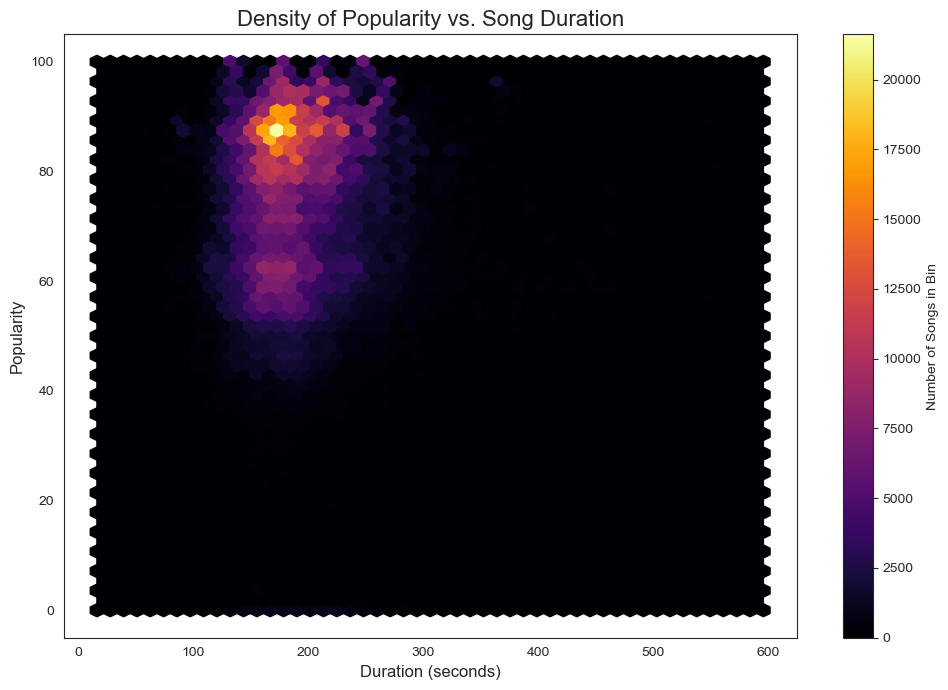

In [79]:
# duration analysis using hexbin plot
plt.figure(figsize=(10, 7))
df_filtered = df[df['duration_seconds'] <= 600] # Songs up to 10 minutes will be filtered

# Create the hexbin plot
plt.hexbin(
    x=df_filtered['duration_seconds'], 
    y=df_filtered['popularity'],
    gridsize=50,
    cmap='inferno' 
)

# Set titles and labels
plt.title('Density of Popularity vs. Song Duration', fontsize=16)
plt.xlabel('Duration (seconds)', fontsize=12)
plt.ylabel('Popularity', fontsize=12)

# Add a color bar to show the density scale
cb = plt.colorbar(label='Number of Songs in Bin')

# Adjust layout and save the plot
plt.tight_layout()
plt.show()

Songs with a length of around 2.5 to 3.5 minutes have the strongest correlation with the highest popularity. Songs significantly shorter or longer than this range are much rarer and have a harder time becoming major hits.

## <b> Correlation analysis

#### <b> Audio feature with popularity

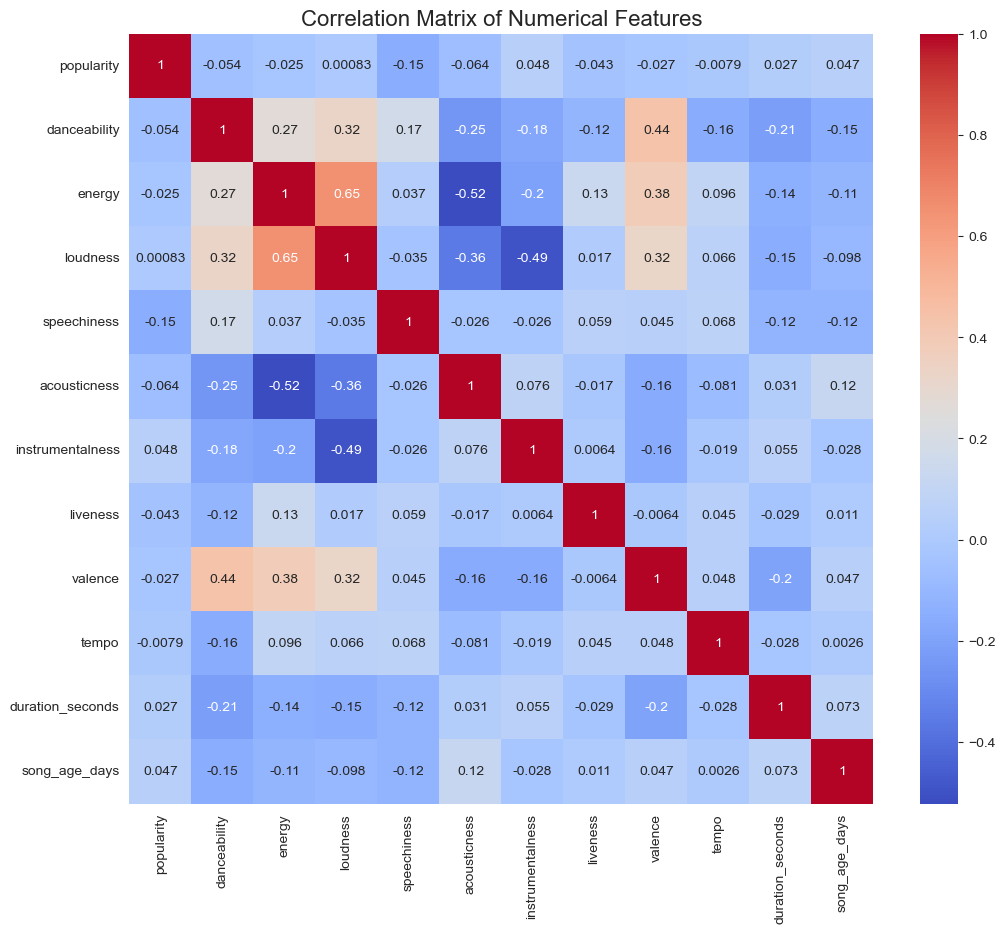

In [80]:
# Select all relevant numerical columns for correlation analysis
numerical_features = [
    'popularity', 'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
    'duration_seconds', 'song_age_days'
]
correlation_df = df[numerical_features]

# Calculate the correlation matrix
corr_matrix = correlation_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True) 
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

From the correlation value, the audio information variable does not correlate with the popularity of a song.

## <b> Songs Segmentation and clustering

#### <b> Cluster modeling

In [81]:
# Scale feature (standarization)
features_for_clustering = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]
X = df[features_for_clustering]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In order to find better insights for all audio features, each song data in the dataset will be clustered based on all audio feature variables.

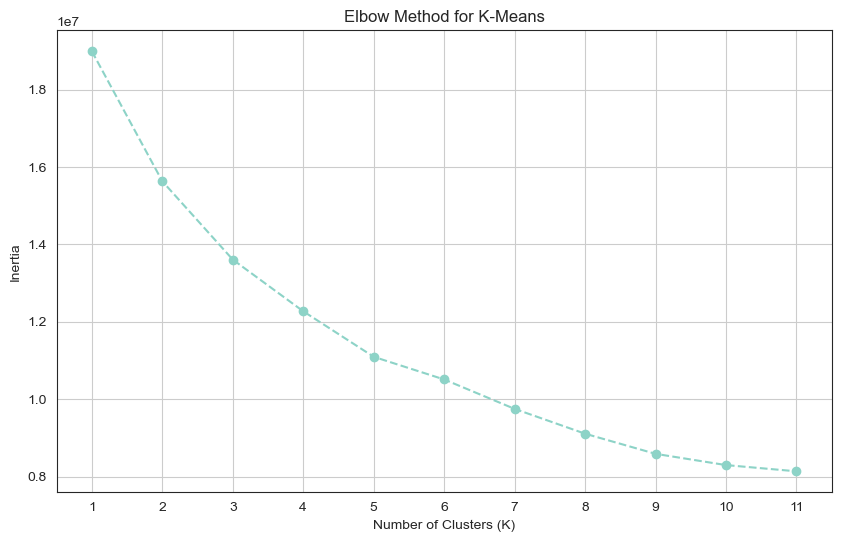

In [82]:
# Elbow method to determine optimal number of cluster
inertia = []
K_range = range(1, 12)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means')
plt.xticks(K_range)
plt.grid(True)
plt.show()

From the elbow method, the most optimal cluster for us to use is 5

In [83]:
# Create model with optimal K from elbow method
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
clusters = kmeans_final.fit_predict(X_scaled)

# Add the new cluster labels to the original DataFrame
df['mood_cluster'] = clusters
print(df['mood_cluster'].value_counts().sort_index())

mood_cluster
0     47595
1    902889
2    265158
3    369698
4    524488
Name: count, dtype: int64


We group each data into 5 groups based on the similarity of all audio features using KMeans, meaning we use centroid-based clustering which measures the average distance of the closest data to the centroid.

#### <b> Analysis based on cluster

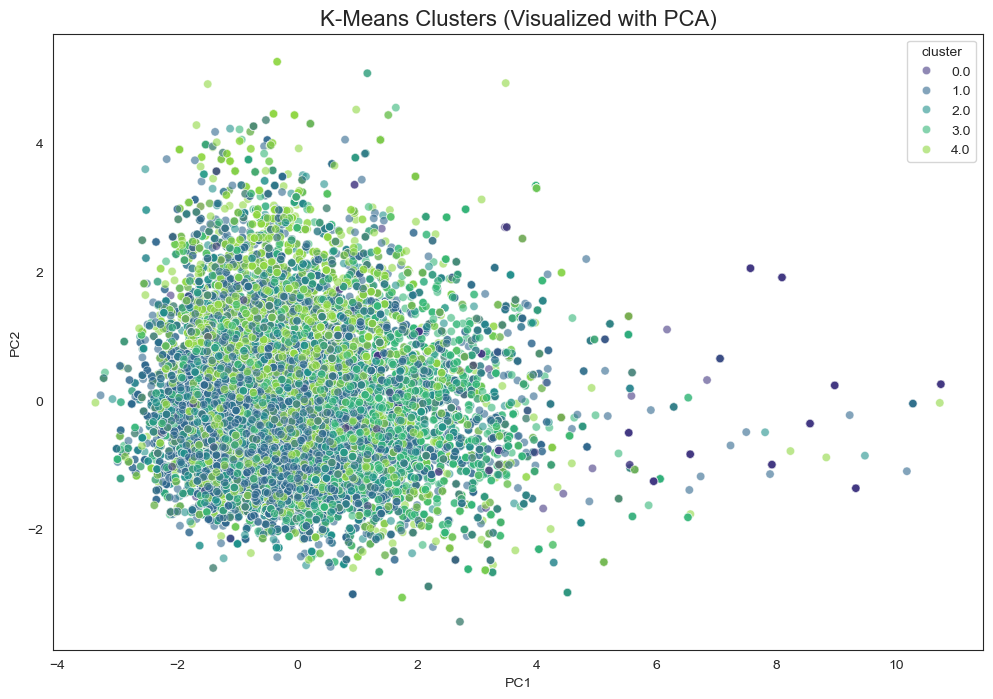

In [84]:
# Dimensional reduction using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = df['mood_cluster']

# Take a sample for faster plotting.
pca_df_sample = pca_df.sample(n=50000, random_state=42)

# Create the scatter plot.
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='cluster', 
    data=pca_df_sample,
    palette=sns.color_palette("viridis", n_colors=optimal_k),
    legend='full',
    alpha=0.6
)
plt.title('K-Means Clusters (Visualized with PCA)', fontsize=16)
plt.show()

Because we visualize in 2 dimensions, the data looks irregular in clustering. This is because we use variables > 2 for data clustering, we use higher dimensions for data clustering but we try to visualize the cluster results using 2D after the dimensional reduction process with PCA.

In [85]:
cluster_name_map = {
    0: "Latin & High-Energy Rhythms",
    1: "Mainstream Pop Hits",
    2: "Sad & Sentimental Ballads",
    3: "Acoustic & Intimate Vibes",
    4: "Groovy & Upbeat Pop/R&B"
}

# The .map() function is used to apply the mapping to the 'mood_cluster' column.
df['mood_cluster'] = df['mood_cluster'].map(cluster_name_map)
df[df["mood_cluster"] == "Groovy & Upbeat Pop/R&B"].head()

,name,artists,album_name,spotify_id,daily_rank,daily_movement,weekly_movement,snapshot_date,popularity,is_explicit,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,song_age_days,duration_seconds,mood_cluster
2,back to friends,sombr,back to friends,0FTmksd2dxiE5e3rWyJXs6,3,0,1,2025-06-11,98,False,...,0.0301,0.000094,0.000088,0.0929,0.235,92.855,4,166,199.032,Groovy & Upbeat Pop/R&B
3,Die With A Smile,"Lady Gaga, Bruno Mars",MAYHEM,7so0lgd0zP2Sbgs2d7a1SZ,4,0,-1,2025-06-11,91,False,...,0.0317,0.289000,0.000000,0.1260,0.498,157.964,3,96,251.667,Groovy & Upbeat Pop/R&B
12,Just Keep Watching (From F1® The Movie),"Tate McRae, F1 The Album",Just Keep Watching (From F1® The Movie),2yWlGEgEfPot0lv3OAjuG3,13,0,-3,2025-06-11,91,False,...,0.1130,0.076700,0.000000,0.5090,0.425,129.956,4,12,142.550,Groovy & Upbeat Pop/R&B
18,That’s So True,Gracie Abrams,The Secret of Us (Deluxe),7ne4VBA60CxGM75vw0EYad,19,2,-1,2025-06-11,96,True,...,0.0368,0.214000,0.000000,0.1590,0.372,108.548,4,236,166.300,Groovy & Upbeat Pop/R&B
21,Iris,The Goo Goo Dolls,Stay with You,4DPdJvSMB6hmrjgC5eC85d,22,28,28,2025-06-11,58,False,...,0.0362,0.001250,0.000008,0.0942,0.497,155.925,3,10023,289.533,Groovy & Upbeat Pop/R&B


After clustering, each song will have its cluster name changed according to the original mood name such as pop hits, acoustic, and others.

## <b> Trend Analysis

#### <b> Year over Year trend on songs mood

In [86]:
# Extract the year from the album_release_date column.
df['release_year'] = df['album_release_date'].dt.year

# proportion each mood per year
yearly_counts = df['release_year'].value_counts()
valid_years = yearly_counts[yearly_counts > 100].index # Only consider years with >100 songs
df_filtered = df[df['release_year'].isin(valid_years) & (df['release_year'] >= 2000)]

# Use crosstab to get the count of each mood per year and normalize it to get proportions.
mood_trends = pd.crosstab(df_filtered['release_year'], df_filtered['mood_cluster'], normalize='index') * 100

mood_trends.T

release_year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
mood_cluster,,,,,,,,,,,,,,,,,,,,,
Acoustic & Intimate Vibes,2.725420,5.494505,16.076081,1.854382,8.382511,56.451161,23.563916,37.893342,15.922401,11.047683,...,24.551712,49.944821,28.574927,19.592448,47.217765,36.583082,29.937563,15.163587,14.269141,10.198372
Groovy & Upbeat Pop/R&B,94.090678,65.247253,27.410109,23.150498,25.952253,26.392387,6.593851,29.115601,47.474378,21.121558,...,21.186369,21.283304,24.926543,37.382378,16.595062,17.368987,24.077557,24.763859,23.708106,26.442201
Latin & High-Energy Rhythms,0.101885,0.000000,0.078166,0.000000,0.000000,0.531766,0.000000,0.000000,0.018302,0.134318,...,0.000000,8.560618,0.997796,4.326042,2.567421,3.554954,0.881070,0.911880,1.088894,13.706281
Mainstream Pop Hits,3.031075,25.824176,56.122981,74.838962,60.702790,9.711727,66.181230,32.991057,36.346999,66.957690,...,24.594204,18.532240,39.416014,21.758524,27.863761,35.927583,35.555911,45.989467,46.309611,37.418726
Sad & Sentimental Ballads,0.050942,3.434066,0.312663,0.156159,4.962446,6.912958,3.661003,0.000000,0.237921,0.738751,...,29.667715,1.679016,6.084721,16.940609,5.755992,6.565394,9.547899,13.171207,14.624248,12.234420


In [87]:
# Apply a 3-year centered rolling average to smooth the data.
mood_trends_smoothed = mood_trends.rolling(window=3, center=True, min_periods=1).mean()

# visualiazation
fig = px.line(
    mood_trends_smoothed,
    title='Evolution of Song Moods Over the Years (Smoothed)',
    labels={
        'release_year': 'Release Year',
        'value': 'Percentage of Songs (%)',
        'mood_cluster': 'Song Mood'
    }
)

# Customize the layout for a cleaner look
fig.update_layout(
    xaxis_title='Release Year',
    yaxis_title='Percentage of Songs (%)',
    legend_title='Song Mood',
    hovermode='x unified' # Shows all data for a given year on hover
)

# Update line thickness
fig.update_traces(line=dict(width=3))
fig.write_html("interactive-plot/mood-trend.html")
fig.show()

The early 2000s were dominated by upbeat R&B and pop. The late 2000s to early 2010s were the golden era of mainstream pop. The last decade (2015-2025) was marked by several key trends:

1. The return of mainstream pop's dominance.
2. The rise of acoustic/personal music and sentimental ballads as key forces.
3. The emergence of Latin music as a fast-growing global genre.

Overall, popular music tastes have shifted from the upbeat and energetic productions of the early millennium toward a more diverse range, embracing more polished pop sounds, acoustic intimacy, emotional depth, and new global rhythms.

#### <b> Year released analysis

--- Time to Reach >90 Popularity ---
Mean time: 786.95 days (approx. 25.9 months)
Median time: 126.00 days (approx. 4.1 months)


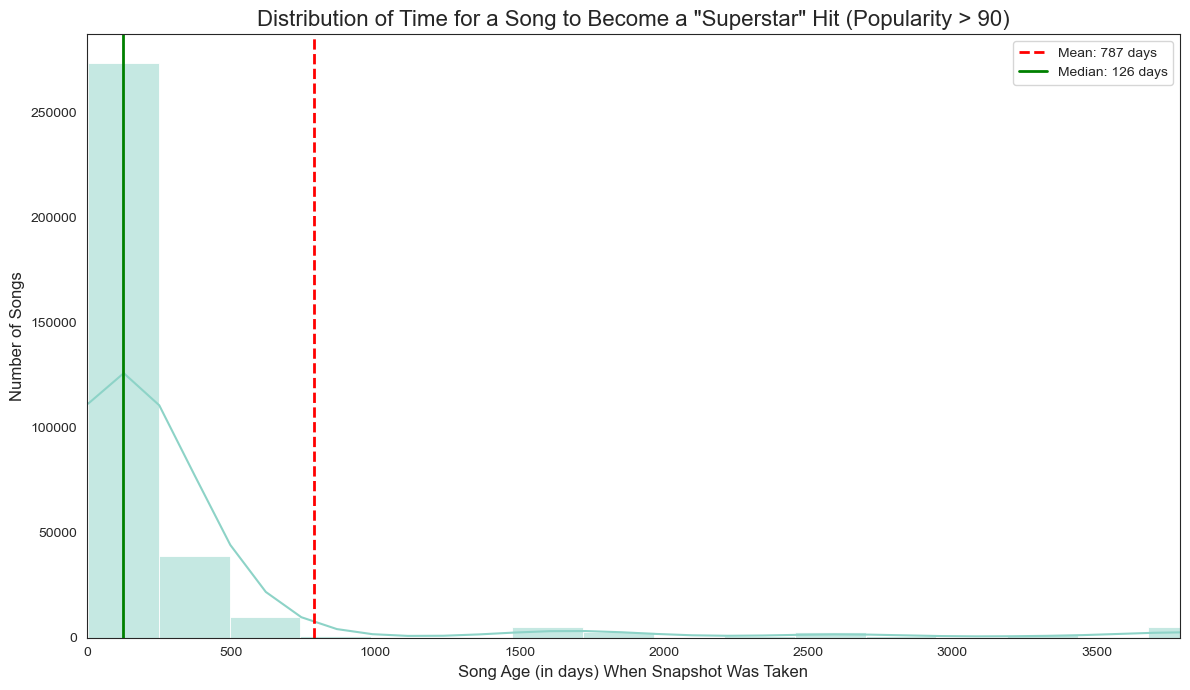

In [88]:
superstar_songs = df[(df['popularity'] > 90) & (df['song_age_days'] >= 0)]

# This will tell us the average and central tendency for how long it takes a song to become a huge hit.
mean_age = superstar_songs['song_age_days'].mean()
median_age = superstar_songs['song_age_days'].median()

print("--- Time to Reach >90 Popularity ---")
print(f"Mean time: {mean_age:.2f} days (approx. {mean_age/30.44:.1f} months)")
print(f"Median time: {median_age:.2f} days (approx. {median_age/30.44:.1f} months)")


# Songs age distribution
plt.figure(figsize=(12, 7))
sns.histplot(
    data=superstar_songs, 
    x='song_age_days', 
    bins=100, 
    kde=True  
)

# Add vertical lines for the mean and median
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.0f} days')
plt.axvline(median_age, color='green', linestyle='-', linewidth=2, label=f'Median: {median_age:.0f} days')

# Set titles and labels
plt.title('Distribution of Time for a Song to Become a "Superstar" Hit (Popularity > 90)', fontsize=16)
plt.xlabel('Song Age (in days) When Snapshot Was Taken', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.legend()
plt.xlim(0, superstar_songs['song_age_days'].quantile(0.95)) # Zoom in on the 95% of the data for clarity

# Save the plot
plt.tight_layout()
plt.show()

Generally, a song becomes a big hit within about 4 months of its release, but a small number of songs take much longer, sometimes years, to reach peak popularity, which significantly increases the overall average time.

#### <b> Songs distribution by mood

--- Popularity Statistics per Mood Cluster ---
                                count       mean        std  min   25%   50%  \
mood_cluster                                                                   
Acoustic & Intimate Vibes    369698.0  74.410908  15.761709  0.0  63.0  77.0   
Groovy & Upbeat Pop/R&B      524488.0  76.654474  15.987528  0.0  66.0  81.0   
Latin & High-Energy Rhythms   47595.0  82.225507  15.518136  0.0  77.0  88.0   
Mainstream Pop Hits          902889.0  77.145513  15.231882  0.0  67.0  81.0   
Sad & Sentimental Ballads    265158.0  71.170400  15.886373  0.0  60.0  72.0   

                              75%    max  
mood_cluster                              
Acoustic & Intimate Vibes    87.0  100.0  
Groovy & Upbeat Pop/R&B      89.0  100.0  
Latin & High-Energy Rhythms  93.0  100.0  
Mainstream Pop Hits          88.0  100.0  
Sad & Sentimental Ballads    85.0   99.0  


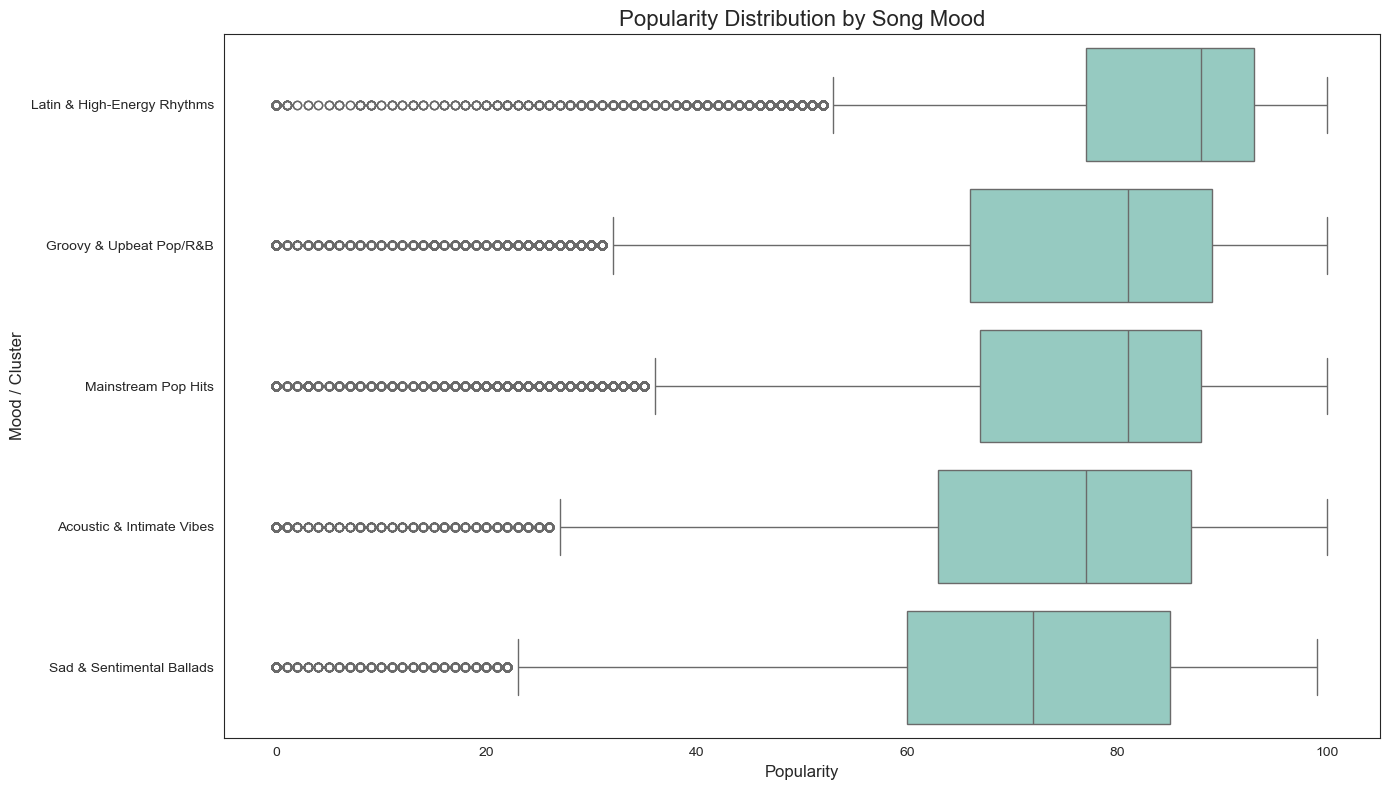

In [89]:
# Numerical summary (mean, median, etc.) of popularity for each mood.
popularity_stats = df.groupby('mood_cluster')['popularity'].describe()
print("--- Popularity Statistics per Mood Cluster ---")
print(popularity_stats)

# the distribution of a numerical variable
plt.figure(figsize=(14, 8))
order_by_median = popularity_stats.sort_values(by='50%', ascending=False).index

sns.boxplot(
    data=df,
    x='popularity',
    y='mood_cluster',
    order=order_by_median
)

# Set titles and labels for clarity
plt.title('Popularity Distribution by Song Mood', fontsize=16)
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Mood / Cluster', fontsize=12)

# Save the plot
plt.tight_layout()
plt.show()

Songs with high energy and strong rhythms (Latin, Pop, R&B) tend to have the highest frequency of popularity. Songs that are calmer, more personal, or sadder (Acoustic, Ballads), while still popular, have a lower average popularity rate.